# 内容来自书本：《Python Data Analysis》
+ GitHub：https://github.com/PacktPublishing/Python-Data-Analysis-Third-Edition

# Chapter 5,数据可视化

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sklearn_pandas

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文字体
sns.set_style('darkgrid')

> lm plots  -> l  -> line
+ 散点图 + 回归分析

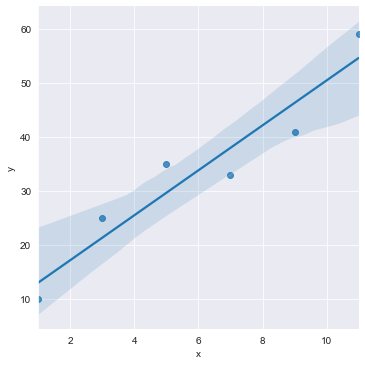

In [9]:
df = pd.DataFrame({'x':[1,3,5,7,9,11],'y':[10,25,35,33,41,59]})
sns.lmplot(x = 'x',y = 'y',data = df,fit_reg= True)
plt.show()

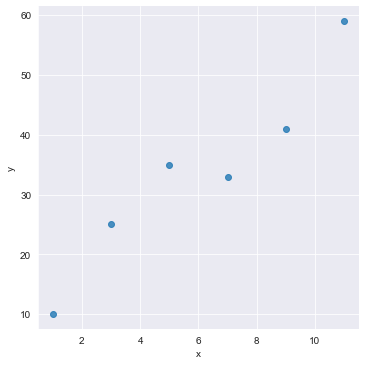

In [11]:
df = pd.DataFrame({'x':[1,3,5,7,9,11],'y':[10,25,35,33,41,59]})
sns.lmplot(x = 'x',y = 'y',data = df,fit_reg= False) # 将fit_reg 设置为false 就是散点图
plt.show()

In [69]:
df = pd.read_csv('Python-Data-Analysis-Third-Edition-master/Chapter05/HR_comma_sep.csv')
df.head() # 员工满意度，工资，离职，等信息

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


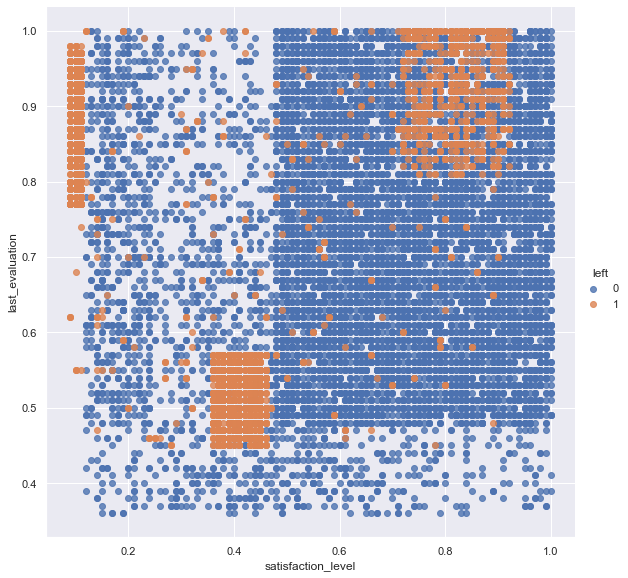

In [70]:
sns.lmplot(x = 'satisfaction_level',y = 'last_evaluation',data = df,fit_reg=False,hue = 'left',height=8,aspect=1) # 高度为8，宽高比为1
plt.show()

> Bar Plots
+ 柱状图

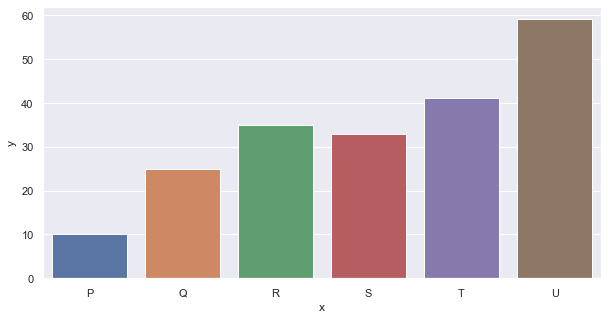

In [71]:
# 设置画布的大小
sns.set(rc={"figure.figsize":(10, 5)}) #width=6, height=5
data = pd.DataFrame({'x':['P','Q','R','S','T','U'],'y':[10,25,35,33,41,59]})

sns.barplot(x = 'x',y = 'y',data = data)
plt.show()

> 分布图 Distribution plots
+ 查看分析数据的分布

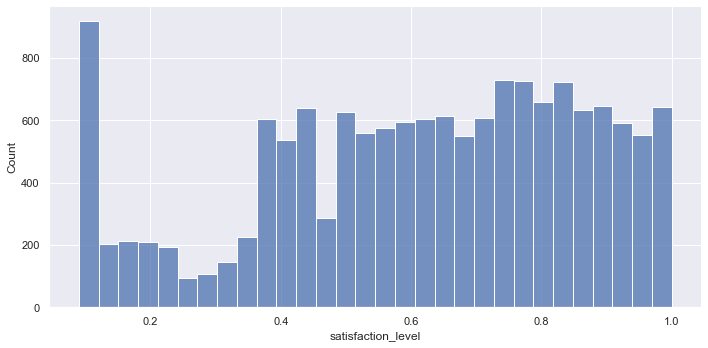

In [79]:
sns.displot(df.satisfaction_level,aspect=2,kind='hist')
plt.show() # 直方图

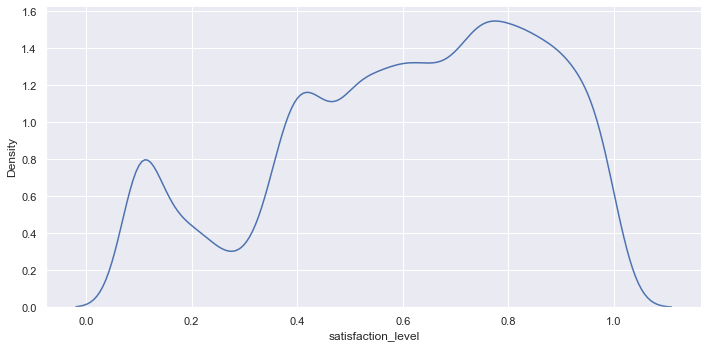

In [81]:
sns.displot(df.satisfaction_level,aspect=2,kind='kde') # 密度图
plt.show() # 直方图

> 箱线图 box plots

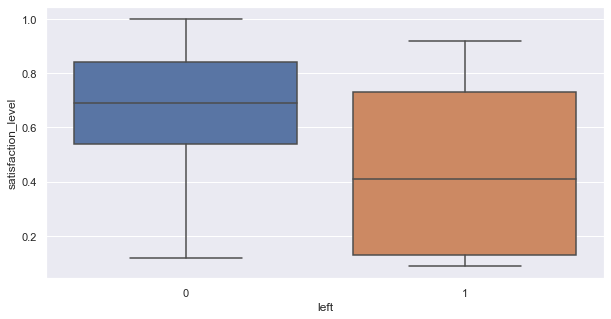

In [92]:
sns.boxplot(y = 'satisfaction_level',x = 'left',data = df)
plt.show()

> Count plots 计数图

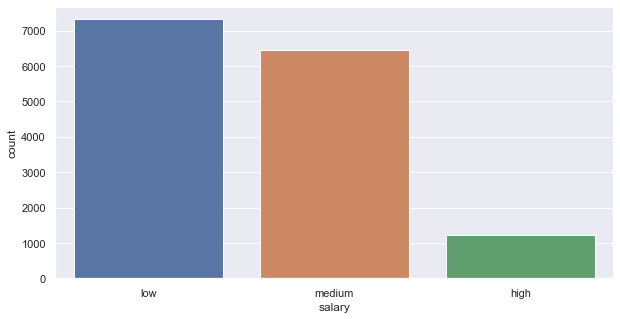

In [95]:
sns.countplot(x = 'salary',data = df)
plt.show()

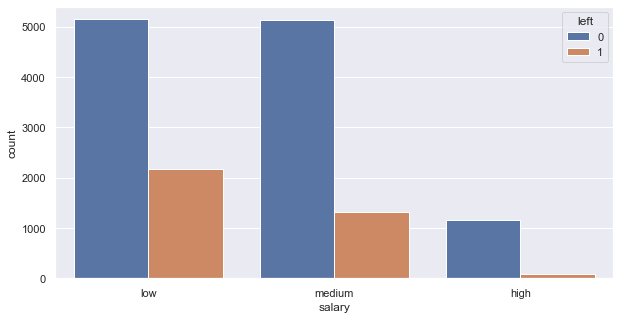

In [96]:
sns.countplot(x = 'salary',data = df,hue = 'left')
plt.show()

> Joint plots 关联图
+ 分析两个变量之间关系，和各个变量的分布

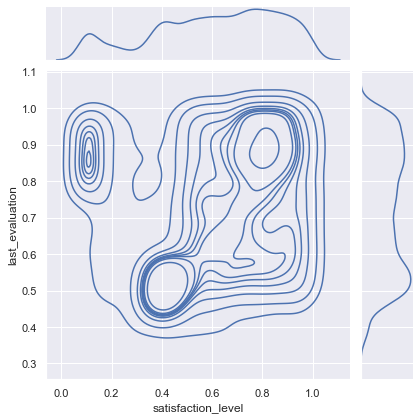

In [102]:
sns.jointplot(data = df,x = 'satisfaction_level',y = 'last_evaluation',kind = 'kde')
plt.show()

> Heatmaps 热力图
+ 分析两个变量之间关系

In [103]:
data = sns.load_dataset("iris") # 加载鸢尾花数据
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [110]:
# 寻找相关关系 
cor_matrix=data.corr() # pandas 自动计算两两变量之间的相关性
cor_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


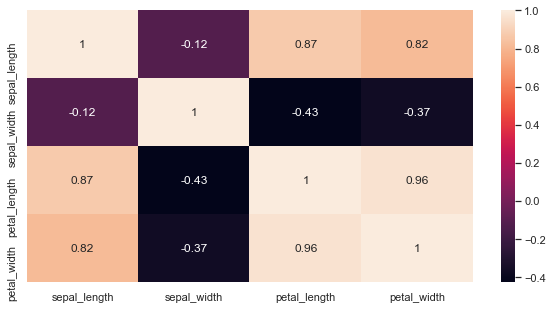

In [111]:
# 创建热力图
sns.heatmap(cor_matrix, annot=True) # annot -> 显示数字
plt.show()

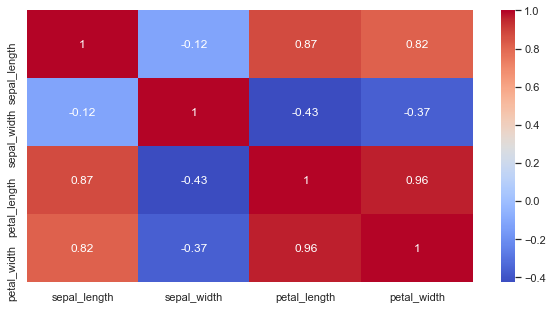

In [119]:
data = sns.load_dataset("iris")
cor_matrix=data.corr()
sns.heatmap(cor_matrix, annot=True,cmap="coolwarm")
plt.show()

> Pair plots 
+ 快速绘制关系图

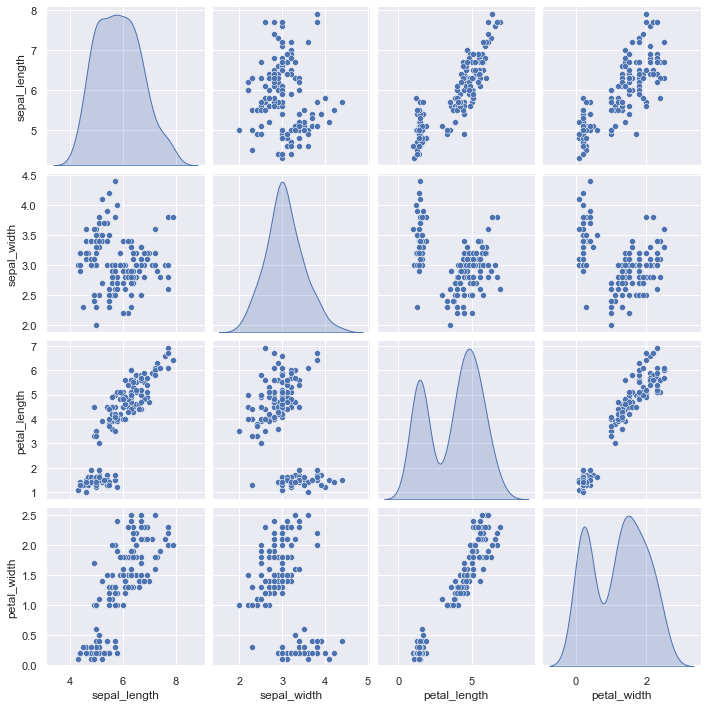

In [122]:
data = sns.load_dataset("iris")

sns.pairplot(data,diag_kind='kde')

plt.show()

## 交互式绘图，Bokeh

> 绘制简单图

In [124]:
# 导入库
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show

In [127]:
x = [1,3,5,7,9,11]
y = [10,25,35,33,41,59]

# Output to notebook 
output_notebook() 
  
# Instantiate a figure 
fig= figure(plot_width = 500, plot_height = 350) 
  
# Create scatter circle marker plot by rendering the circles  
fig.circle(x, y, size = 10, color = "red", alpha = 0.7,name='Bokeh circle') 
  
# Show the plot
show(fig)

Loading BokehJS ...

In [128]:
x_values = [1,3,5,7,9,11]
y_values = [10,25,35,33,41,59]

output_notebook() 

p = figure(plot_width = 500, plot_height = 350) 
  
# 绘制折线图
p.line(x_values, y_values,  line_width = 1, color = "blue") 
  
show(p)

Loading BokehJS ...

##  布局 

In [130]:
# Import the required modules
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook, show 
from bokeh.layouts import row, column  # 用于多图的布局

# 鸢尾花数据集
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# 三个画布
fig1 = figure(plot_width = 300, plot_height = 300)
fig2 = figure(plot_width = 300, plot_height = 300)
fig3 = figure(plot_width = 300, plot_height = 300)

# 三个散点图
fig1.circle(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.circle(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)
fig3.circle(df['petal_length'], df['petal_width'], size=8,  color = "red", alpha = 0.5)


# 行布局
row_layout = row(fig1, fig2, fig3)

# Show the plot
show(row_layout)

Loading BokehJS ...

In [132]:
# Import the required modules
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.layouts import row, column

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# Instantiate a figure 
fig1 = figure(plot_width = 300, plot_height = 300)
fig2 = figure(plot_width = 300, plot_height = 300)
fig3 = figure(plot_width = 300, plot_height = 300)

# Create scatter marker plot by render the circles  
fig1.circle(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.circle(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)
fig3.circle(df['petal_length'], df['petal_width'], size=8,  color = "red", alpha = 0.5)

# 嵌套的行列布局
nasted_layout = row(fig1, column(fig2, fig3))

# Show the plot
show(nasted_layout)

Loading BokehJS ...

In [144]:
# Import the required modules
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.layouts import row, column,gridplot

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# Instantiate a figure 
fig1 = figure(plot_width = 300, plot_height = 300)
fig2 = figure(plot_width = 300, plot_height = 300)
fig3 = figure(plot_width = 300, plot_height = 300)

# Create scatter marker plot by render the circles  
fig1.circle(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.circle(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)
fig3.circle(df['petal_length'], df['petal_width'], size=8,  color = "red", alpha = 0.5)

# 网格布局
# sizing_mode (``"fixed"``, ``"stretch_both"``, ``"scale_width"``, ``"scale_height"``, ``"scale_both"`` )
nasted_layout = gridplot([[fig1,fig2], [None,fig3]],sizing_mode='stretch_both')

# Show the plot
show(nasted_layout)

Loading BokehJS ...

## 交互

In [146]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models import CategoricalColorMapper

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [147]:
# Output to notebook 
output_notebook() 


# Instantiate a figure object 
fig = figure(plot_width = 500, plot_height = 350, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width')

#  绘制每种鸢尾花的散点图
for specie, color in zip(['setosa', 'virginica','versicolor'], ['blue', 'green', 'red']):
    data = df[df.species==specie]
    fig.circle(source=data, x = 'petal_length', y = 'petal_width', size=8, color=color, alpha = 0.7, legend_label=specie)

# Set the legend location and click policy
fig.legend.location = 'top_left'
fig.legend.click_policy="hide" # 当图例被点击的时候，隐藏对应的数据

# Show the plot
show(fig)

Loading BokehJS ...

> 点击图例 突出某个类别

In [148]:
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models import CategoricalColorMapper

# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 


# Instantiate a figure object 
fig = figure(plot_width = 500, plot_height = 350, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width')

# Create scatter marker plot by render the circles  
for specie, color in zip(['setosa', 'virginica','versicolor'], ['blue', 'green', 'red']):
    data = df[df.species==specie]
    fig.circle('petal_length', 'petal_width', size=8, color=color, alpha = 0.7, legend_label=specie, source=data,
            muted_color=color, muted_alpha=0.2)

# Set the legend location and click policy
fig.legend.location = 'top_left'
fig.legend.click_policy="mute"

# Show the plot
show(fig)


Loading BokehJS ...

## Annotations -- Hover tool 
+ 鼠标悬浮显示

In [153]:
from bokeh.plotting import figure 
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models import CategoricalColorMapper
from bokeh.models import HoverTool  # 鼠标悬浮

from bokeh.sampledata.iris import flowers as df

output_notebook() 

# Create color mapper for categorical column 
mapper = CategoricalColorMapper(factors=['setosa', 'virginica', 'versicolor'], 
                                palette=['blue', 'green', 'red'])

color_dict={'field': 'species','transform': mapper}

# 控制鼠标悬浮显示的信息
hover = HoverTool(tooltips=[('Species type','@species'),
                            ('IRIS Petal Length','@petal_length'),
                            ('IRIS Petal Width', '@petal_width')])

# Instantiate a figure object
p = figure(plot_width = 500, plot_height = 350, title="Petal length Vs. Petal Width", 
           x_axis_label='petal_length', y_axis_label='petal_width',
           tools=[hover, 'pan', 'wheel_zoom'])

#  一次性绘制三个品种的散点图，用到了color_dict进行颜色映射和legend_group
p.circle('petal_length', 'petal_width', size=8, color=color_dict, alpha = 0.5,legend_group='species',source=df)

# Set the legend location
p.legend.location = 'top_left'

# Show the plot
show(p)


Loading BokehJS ...

## Widgets: Tab Panel  面板

In [154]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show 
from bokeh.models.widgets import Tabs
from bokeh.models.widgets import Panel

from bokeh.sampledata.iris import flowers as df

# Output to notebook 
output_notebook() 

# Instantiate a figure 
fig1 = figure(plot_width = 300, plot_height = 300)
fig2 = figure(plot_width = 300, plot_height = 300)

# 散点图
fig1.circle(df['petal_length'], df['sepal_length'], size=8,  color = "green", alpha = 0.5)
fig2.circle(df['petal_length'], df['sepal_width'], size=8,  color = "blue", alpha = 0.5)


# Create panels 一个panel 有两个 tab
tab1 = Panel(child=fig1, title='tab1')
tab2 = Panel(child=fig2, title='tab2')

# Create tab by putting panels into it
tab_layout = Tabs(tabs=[tab1,tab2])

# Show the plot
show(tab_layout)


Loading BokehJS ...

> Slsider 滑条

In [156]:
from bokeh.plotting import Figure 
from bokeh.plotting import output_notebook 
from bokeh.plotting import show
from bokeh.models import CustomJS 
from bokeh.models import ColumnDataSource
from bokeh.models import Slider  # 滑条
from bokeh.layouts import column

# Show output in notebook 
output_notebook() 

# Create list of data
x = [x for x in range(0, 100)]
y = x

# Create a DataFrame
df = ColumnDataSource(data={"x_values":x, "y_values":y})

# Instantiate the Figure object 
fig = Figure(plot_width=350, plot_height=350)

# Create a line plot  
fig.line('x_values', 'y_values', source=df, line_width=2.5, line_alpha=0.8)

# Create a callback using CustomJS
callback = CustomJS(args=dict(source=df), code="""
    var data = source.data;
    var f = cb_obj.value
    var x_values = data['x_values']
    var y_values = data['y_values']
    for (var i = 0; i < x_values.length; i++) {
        y_values[i] = Math.pow(x_values[i], f)
    }
    source.change.emit();
""")

slider_widget = Slider(start=0.0, end=10, value=1, step=.1, title="Display power of x")

slider_widget.js_on_change('value', callback)

# Create layout
slider_widget_layout = column(fig,slider_widget)

# Display the layout
show(slider_widget_layout)

Loading BokehJS ...

# Cleaning Messy Data 
+ 清理数据
+ 数据预处理
# 使用的库
+ pandas
+ sklearn
+ pandas_profiling
+ sklearn_pandas

## 数据观察

In [162]:
import pandas_profiling
import sklearn_pandas

In [157]:
data = pd.read_csv('Python-Data-Analysis-Third-Edition-master/Chapter07/employee.csv')
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [164]:
pandas_profiling.ProfileReport(data)
# 查看概述报告

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [165]:
data.tail()

,name,age,income,gender,department,grade,performance_score
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [166]:
data.shape

(9, 7)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [171]:
data.describe().T # 查看分布

,count,mean,std,min,25%,50%,75%,max
age,7.0,40.428571,12.204605,23.0,31.0,45.0,49.5,54.0
income,7.0,52857.142857,26028.372797,16000.0,38500.0,52000.0,63500.0,98000.0
performance_score,9.0,610.666667,235.671912,53.0,556.0,674.0,711.0,901.0


## 数据过滤
+ 列方向过滤
+ 行方向过滤

In [173]:
# 列方向过滤出两列数据
data.filter(['name','department'])

,name,department
0,Allen Smith,Operations
1,S Kumar,Finance
2,Jack Morgan,Finance
3,Ying Chin,Sales
4,Dheeraj Patel,Operations
5,Satyam Sharma,Sales
6,James Authur,Operations
7,Josh Wills,Finance
8,Leo Duck,Sales


In [175]:
data[['name']] # 通过切片过滤列

,name
0,Allen Smith
1,S Kumar
2,Jack Morgan
3,Ying Chin
4,Dheeraj Patel
5,Satyam Sharma
6,James Authur
7,Josh Wills
8,Leo Duck


In [174]:
# 行方向过滤三行
data.filter([0,1,2],axis=0)

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674


In [177]:
data[0:2] # 切片过滤行

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520


In [178]:
# 条件过滤
data[data.department == 'Finance']

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


In [181]:
data.where(data.department == 'Finance',0)  # 符合条件的保留，不符合条件的用0替换

,name,age,income,gender,department,grade,performance_score
0,0,0.0,0.0,0,0,0,0
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,0,0.0,0.0,0,0,0,0
4,0,0.0,0.0,0,0,0,0
5,0,0.0,0.0,0,0,0,0
6,0,0.0,0.0,0,0,0,0
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,0,0.0,0.0,0,0,0,0


In [184]:
data.mask(data.department == 'Finance',0)  # 符合条件的用0填充，和where正好相反

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,0,0.0,0.0,0,0,0,0
2,0,0.0,0.0,0,0,0,0
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,0,0.0,0.0,0,0,0,0
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [185]:
# isin 函数 过滤

data[data.department.isin(['Finance','Sales'])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [186]:
# 使用比较运算符过滤

data[data.performance_score >= 700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [187]:
# 也可以使用 querry方法

data.query('performance_score < 500')

,name,age,income,gender,department,grade,performance_score
6,James Authur,54.0,NaN,F,Operations,G3,53


## 处理缺失值
+ 丢弃
+ 手动填充
+ 均值，中位数，众数等统计学指标填充
+ 使用机器学习算法填充（KNN，回归算法，随机森林等）

In [201]:
data[data.isnull().any(axis = 1)]  # 过滤出含有缺失值的行

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53


In [189]:
# 丢掉含有缺失值的记录

data.dropna() # 丢掉含有缺失值的行

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [209]:
# 填充缺失值
data.age.fillna(int(data.age.mean()),inplace=True)  # 使用均值填充

In [210]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,40.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,40.0,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [211]:
data.income.fillna(data.income.median(),inplace=True) # 中位数填充
data.gender.fillna(data.gender.mode()[0],inplace=True) # 众数填充
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,40.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,40.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [215]:
data.isnull().sum().sum() # 价差是否后还有空值

0

In [217]:
data = pd.read_csv('Python-Data-Analysis-Third-Edition-master/Chapter07/employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


> 插值填充缺失值

In [220]:
data.interpolate(limit_direction='both') # 只对数字有效

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,16000.0,NaN,Operations,G3,723
1,S Kumar,38.5,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,42.0,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,57000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [228]:
data.age.interpolate(method='polynomial',order = 2).to_frame() # 二项式填充

,age
0,45.000000
1,29.329069
2,32.000000
3,45.000000
4,30.000000
5,37.473348
6,54.000000
7,54.000000
8,23.000000


In [235]:
data.income.interpolate(limit_direction='both').to_frame() # 默认线性插值

,income
0,16000.0
1,16000.0
2,35000.0
3,65000.0
4,42000.0
5,62000.0
6,57000.0
7,52000.0
8,98000.0


## 离群值的处理
+ 使用箱线图寻找离群值
+ 散点图寻找离群值
+ Z-Score 数据标准化(减去均值再除以方差)，绘制标准化曲线，离群值会出现在曲线的尾部，距离均值很远
+ IQR = Q3 - Q1 ：不在 "上四分位数与下四分位数" 之间的数(箱线图可以很直观的表现出来)
+ 百分位数

In [247]:
#
data = pd.read_csv('Python-Data-Analysis-Third-Edition-master/Chapter07/employee.csv')
data = data.interpolate(limit_direction = 'both')
data['gender'] = data.gender.fillna(data.gender.mode()[0])
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,16000.0,F,Operations,G3,723
1,S Kumar,38.5,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,42.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,57000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


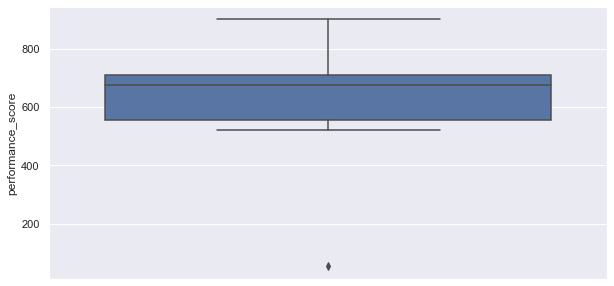

In [253]:
# 使用标准差去掉离群值

sns.boxplot(y = 'performance_score',data = data)
plt.show() 

In [259]:
upper_limit = data.performance_score.mean() + 3*data.performance_score.std() # 上四分位数
lower_limit =  data.performance_score.mean() - 3*data.performance_score.std() # 上四分位数
lower_limit

-96.34906866034851

In [261]:
# 过滤数据，使用这种方法，数据都被保留了下来

data[(data.performance_score > lower_limit)&(data.performance_score<upper_limit)]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,16000.0,F,Operations,G3,723
1,S Kumar,38.5,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,42.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,57000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


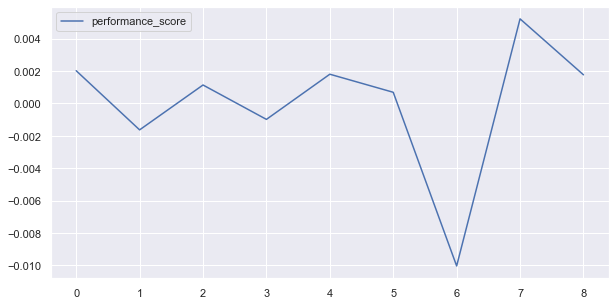

In [257]:
((data.performance_score - data.performance_score.mean())/data.performance_score.var()).to_frame().plot()
plt.show()

In [260]:
# 6，和 7 都是比较偏离整体数据的值

In [263]:
# 使用百分位数过滤数据

upper_limit = data.performance_score.quantile(.99)  # 99%分位数
lower_limit = data.performance_score.quantile(.01)  # 1% 分位数

# 过滤数据，使用这种方法，数过滤了两行数据，分别是  6  7  两个索引行

data[(data.performance_score > lower_limit)&(data.performance_score<upper_limit)]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,16000.0,F,Operations,G3,723
1,S Kumar,38.5,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,42.0,62000.0,F,Sales,G3,649
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


## 特征编码
+ One-hot 独热编码

In [264]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,16000.0,F,Operations,G3,723
1,S Kumar,38.5,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,42.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,57000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [266]:
# 对性别

pd.get_dummies(data.gender)  # 独热编码

,F,M
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1


In [267]:
data = data.join(pd.get_dummies(data.gender))
data

,name,age,income,gender,department,grade,performance_score,F,M
0,Allen Smith,45.0,16000.0,F,Operations,G3,723,1,0
1,S Kumar,38.5,16000.0,F,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0
5,Satyam Sharma,42.0,62000.0,F,Sales,G3,649,1,0
6,James Authur,54.0,57000.0,F,Operations,G3,53,1,0
7,Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0
8,Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1


> Label encoding 标签编码
+ 将分类型变量用数字表示

In [279]:
mapper = sklearn_pandas.DataFrameMapper([('department', preprocessing.LabelEncoder())])

In [281]:
mapper.fit_transform(data[['department']])

array([[1],
       [0],
       [0],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2]])